Let's get started with the project on Student performance in exams we have data.so,import the libraries required.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")

import plotly.plotly as py
import plotly.graph_objs as go

I'm giving the variable name as exams and reading the file by giving pandas read CSV file.

In [2]:
exams=pd.read_csv('StudentsPerformance.csv')

We will use head function to see the 1st five Students data.

then we can understand where we need to get started how to explore the data Analysis.

In [31]:
exams.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_score,reading_score,writing_score,overall_pass_status,Total_marks,percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,247,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,278,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P,148,49.333333,E
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,229,76.333333,B


Now, we'll use describe function to know how much numerical data is there in the data set.

And also info function to know how many rows and columns,data size and integer type.

In [4]:
exams.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


while we proceed to any data we have to make sure that there is any missing data because a dataset contain any missing values.

we cannot get exact predictions and analysis,for that we'll use seaborn heatmap if any data is missing it indicates with color lines. 

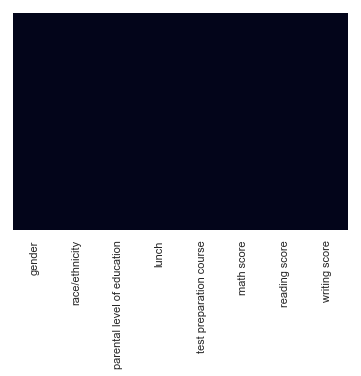

In [6]:
sns.heatmap(exams.isnull(),yticklabels=False,cbar=False)

let's explore the data with "Gender" key column in the dataset.

By group wise for that we''ll use countplot "Gender" on x-axis numbers on y-axis.

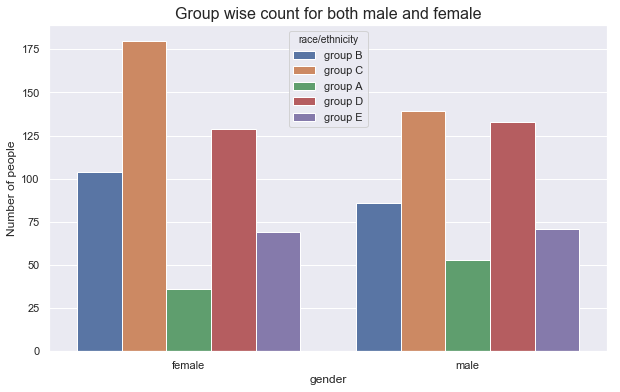

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='gender',hue='race/ethnicity',data=exams)
plt.title('Group wise count for both male and female',fontsize=16)
plt.ylabel('Number of people',fontsize=12)
plt.show()

Let us see how the parental level of education in both male and female by using countplot function.

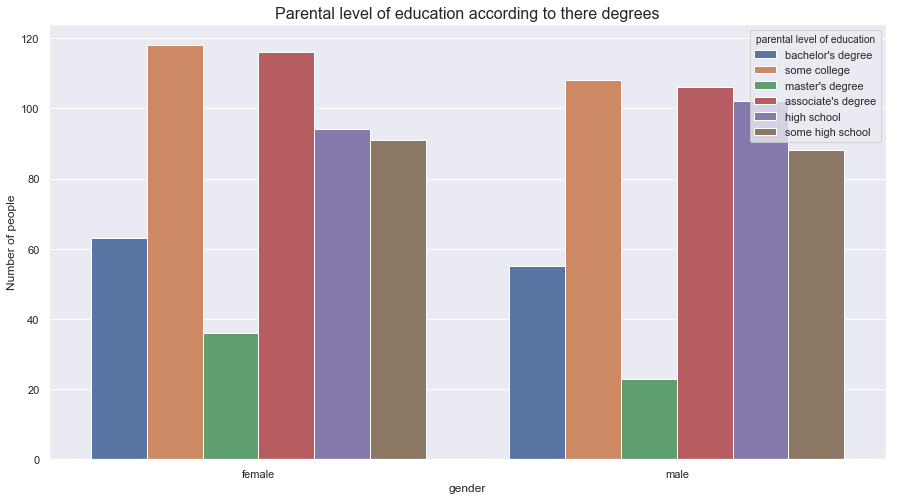

In [8]:
plt.figure(figsize=(15,8))
ple=exams['parental level of education'].sort_values(ascending=True)
sns.countplot(x='gender',hue='parental level of education',data=exams)
plt.title('Parental level of education according to there degrees',fontsize=16)
plt.ylabel('Number of people',fontsize=12)
plt.show()

In both male and female how got free lunch and standard it will give us a picture.

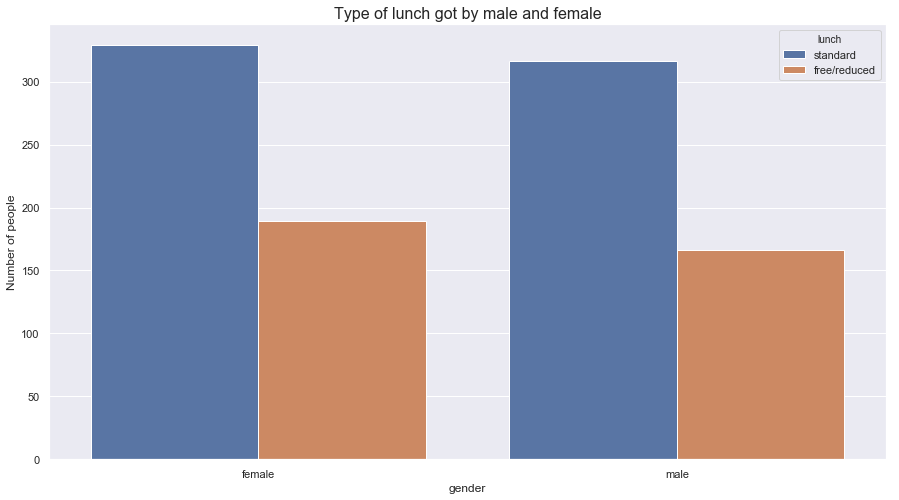

In [9]:
plt.figure(figsize=(15,8))
ple=exams['lunch'].sort_values(ascending=True)
sns.countplot(x='gender',hue='lunch',data=exams)
plt.title('Type of lunch got by male and female',fontsize=16)
plt.ylabel('Number of people',fontsize=12)
plt.show()

So let's go deep inside the data we are going for maximum and minimum to know who scored more and less in

Math score

Reading score

Writing score

In [10]:
highest_mathscore=exams.iloc[[exams['math score'].idxmax()]]
highest_mathscore

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
149,male,group E,associate's degree,free/reduced,completed,100,100,93


In [11]:
lowest_mathscore=exams.iloc[[exams['math score'].idxmin()]]
lowest_mathscore

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10


In [12]:
highest_readingscore=exams.iloc[[exams['reading score'].idxmax()]]
highest_readingscore

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
106,female,group D,master's degree,standard,none,87,100,100


In [13]:
lowest_readingscore=exams.iloc[[exams['reading score'].idxmin()]]
lowest_readingscore

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10


In [14]:
highest_writingscore=exams.iloc[[exams['writing score'].idxmax()]]
highest_writingscore

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
106,female,group D,master's degree,standard,none,87,100,100


In [15]:
lowest_writingscore=exams.iloc[[exams['writing score'].idxmin()]]
lowest_writingscore

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10


We are going to find who failed in the exams by setting the passmark=40.

In [16]:
passmark=40

In [17]:
exams['math_score']=np.where(exams['math score']<passmark,'F','P')
exams['math_score'].value_counts()

P    960
F     40
Name: math_score, dtype: int64

So we will put these data in graphical way pie chart in the three examinations.

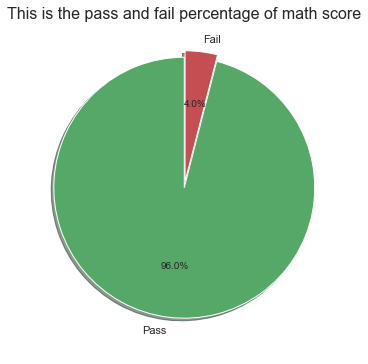

In [18]:
slices=['960','40']
values=['P','F']
labels=['Pass','Fail']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['g','r'])
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.title('This is the pass and fail percentage of math score',fontsize=16)
plt.show()

In [19]:
exams['reading_score']=np.where(exams['reading score']<passmark,'F','P')
exams['reading_score'].value_counts()

P    974
F     26
Name: reading_score, dtype: int64

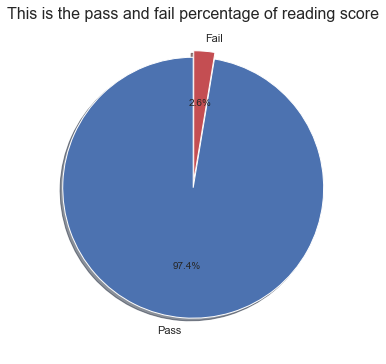

In [20]:
slices=['974','26']
values=['P','F']
labels=['Pass','Fail']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['b','r'])
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.title('This is the pass and fail percentage of reading score',fontsize=16)
plt.show()

In [21]:
exams['writing_score']=np.where(exams['writing score']<passmark,'F','P')
exams['writing_score'].value_counts()

P    968
F     32
Name: writing_score, dtype: int64

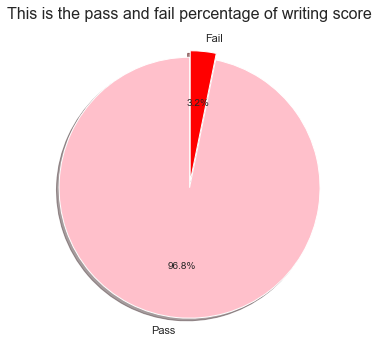

In [22]:
slices=['968','32']
values=['P','F']
labels=['Pass','Fail']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['pink','red'])
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.title('This is the pass and fail percentage of writing score',fontsize=16)
plt.show()

Lets see who is taken the course and who actually isn't.

Text(0.5, 1.0, 'Number of students completed the course and none')

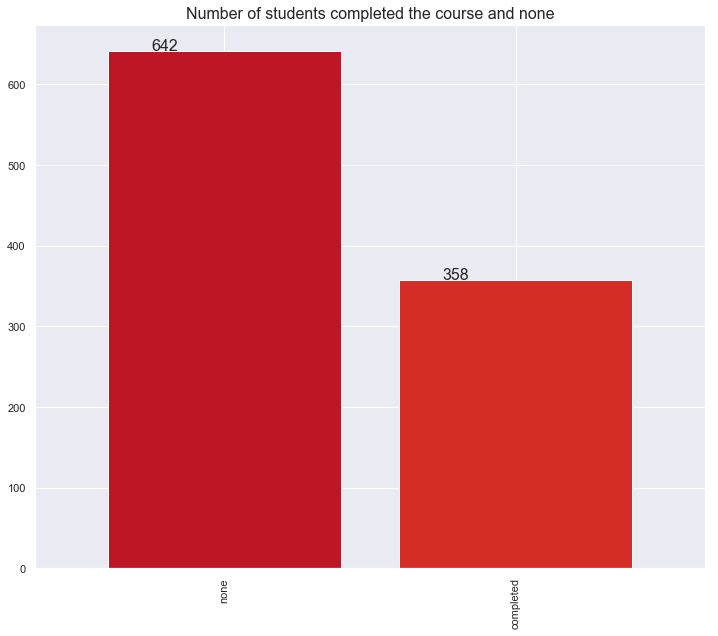

In [33]:
plt.subplots(figsize=(12,10))
test=exams['test preparation course'].value_counts().head().plot.bar(width=.8,color=sns.color_palette('RdYlGn',20))
for p in test.patches:
    test.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25),fontsize=16)
plt.title("Number of students completed the course and none",fontsize=16)

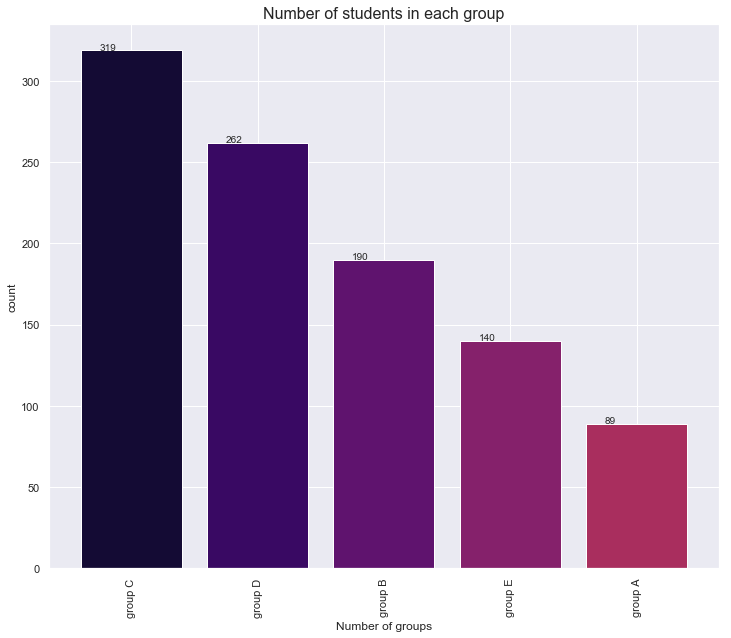

In [36]:
plt.subplots(figsize=(12,10))
ax=exams['race/ethnicity'].value_counts().head(10).plot.bar(width=.8,color=sns.color_palette('inferno',10))
ax.set_xlabel('Number of groups')
ax.set_ylabel('count')
plt.title("Number of students in each group",fontsize=16)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

Now we do how many students are passed overall.

In [25]:
exams['overall_pass_status']=exams.apply(lambda x:'F' if x ['math_score']=='F' or 
                                         x['reading_score']=='F'or x['writing_score']=='F' else 'P',axis=1)
exams['overall_pass_status'].value_counts()


P    949
F     51
Name: overall_pass_status, dtype: int64

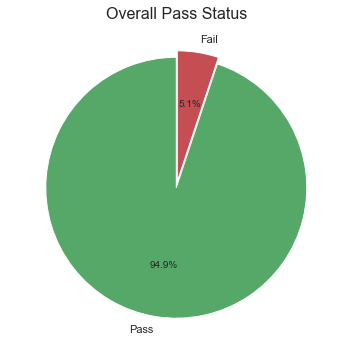

In [26]:
slices=['949','51']
values=['P','F']
labels=['Pass','Fail']
plt.pie(slices,labels=labels,startangle=90,explode=(0,0.05),autopct='%1.1f%%',colors=['g','r'])
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.title('Overall Pass Status',fontsize=16)
plt.show()

We are done with according the scores and overall Pass and fail what about the percentage?

by adding all three scores and setting the grades.

In [27]:
exams['Total_marks']=exams['math score']+exams['reading score']+exams['writing score']
exams['percentage']=exams['Total_marks']/3

In [28]:
def GetGrade(percentage, overall_pass_status):
    if ( overall_pass_status == 'F'):
        return 'F'    
    if ( percentage >= 80 ):
        return 'A'
    if ( percentage >= 70):
        return 'B'
    if ( percentage >= 60):
        return 'C'
    if ( percentage >= 50):
        return 'D'
    if ( percentage >= 40):
        return 'E'
    else: 
        return 'F'

exams['Grade'] = exams.apply(lambda x : GetGrade(x['percentage'], x['overall_pass_status']), axis=1)

exams.Grade.value_counts()

B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64

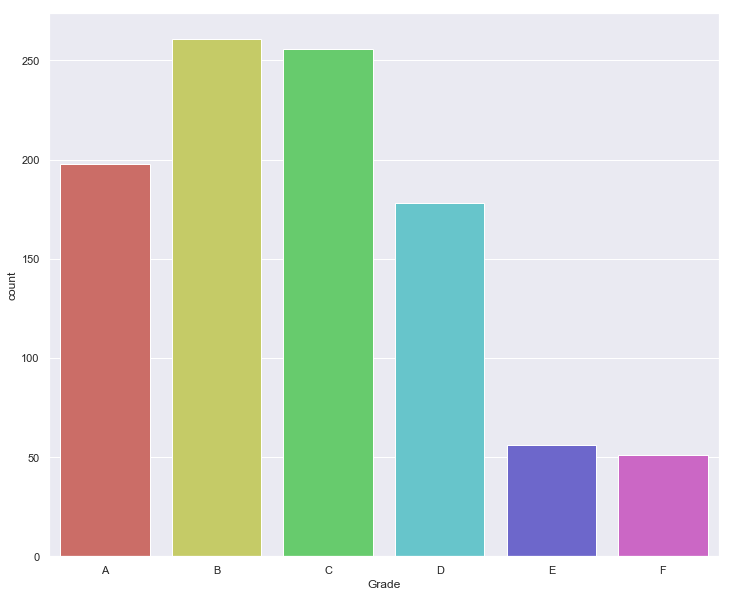

In [29]:
plt.figure(figsize=(12,10))
sns.countplot(x='Grade',data=exams,order=['A','B','C','D','E','F'],palette='hls')
plt.show()

we came to the conclusion and in this final part we will check grading wise according to parental level of education. 

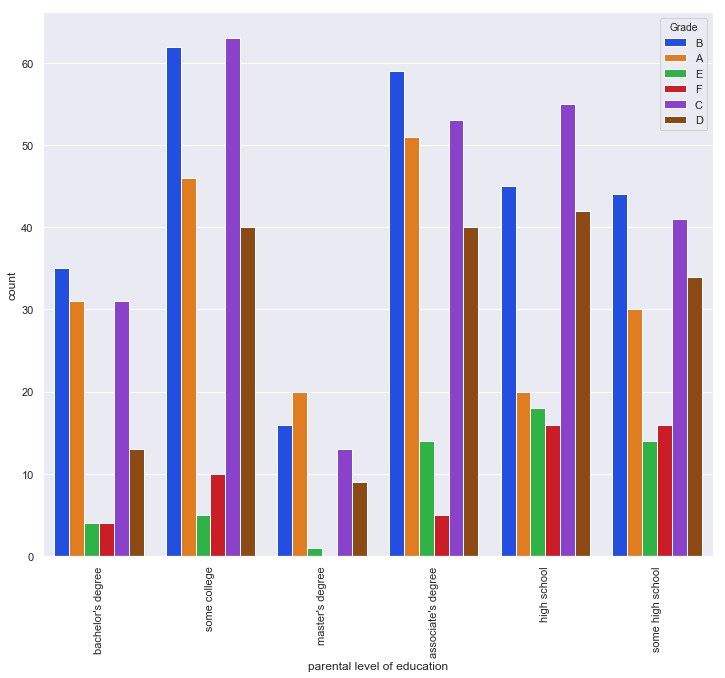

In [30]:
plt.figure(figsize=(12,10))
p=sns.countplot(x='parental level of education',data=exams,hue='Grade',palette='bright')
figgy=plt.setp(p.get_xticklabels(),rotation=90)